In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
x=df.drop(['Outcome'], axis='columns')
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
y=df.Outcome 
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=20)

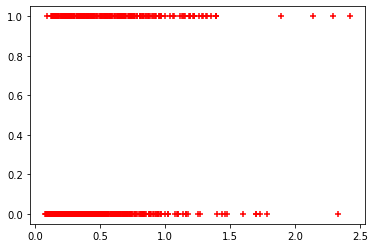

In [9]:
plt.scatter(df.DiabetesPedigreeFunction, df.Outcome, marker='+', color='red')

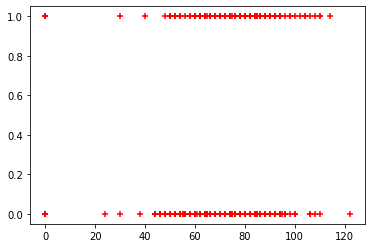

In [10]:
plt.scatter(df.BloodPressure, df.Outcome, marker='+', color='red')

# logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [12]:
model1.fit(x_train, y_train)

LogisticRegression()

In [15]:
model1.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [16]:
y_test

143    1
14     1
504    0
557    0
736    0
      ..
57     0
140    0
713    0
673    0
559    0
Name: Outcome, Length: 154, dtype: int64

In [17]:
model1.score(x_test, y_test)

0.7532467532467533

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
model2=RandomForestClassifier()

In [21]:
model2.fit(x_train, y_train)

RandomForestClassifier()

In [22]:
model2.score(x_test, y_test)

0.7337662337662337

# cross validation score

In [23]:
from sklearn.model_selection import cross_val_score

In [28]:
cross_val_score(RandomForestClassifier(),x_test,y_test )

array([0.77419355, 0.64516129, 0.70967742, 0.64516129, 0.73333333])

In [29]:
cross_val_score(LogisticRegression(),x_test,y_test )

array([0.74193548, 0.5483871 , 0.74193548, 0.74193548, 0.66666667])

# difference table

In [ ]:
# using model1

In [35]:
predicted_value=model1.predict(x_test)

In [41]:
df1=pd.DataFrame({'Actual_value':y_test,'predicted_value':predicted_value})
df1.head()

,Actual_value,predicted_value
143,1,1
14,1,0
504,0,0
557,0,0
736,0,0


In [ ]:
#using model2

In [38]:
predicted_value=model2.predict(x_test)

In [40]:
df2=pd.DataFrame({'Actual_value':y_test,'predicted_value':predicted_value})
df2.head()

,Actual_value,predicted_value
143,1,1
14,1,0
504,0,0
557,0,0
736,0,0
